First let's import all the packages that we will need during this task.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing S&P500 Dataset
The Standard and Poor's 500, or simply the S&P 500, is a dataset of stock market index tracking the stock performance of 500 large companies listed on stock exchanges in the United States.


In [92]:
stocks_df=pd.read_csv("S&P500 Stocks/all_stocks_5yr.csv")

### Exploring Stocks Data Frame
To get familiar with the stock market dataset we will print the first few cells.

In [93]:
stocks_df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### Setting Date column as the index.

In [94]:
stocks_df['date']=pd.to_datetime(stocks_df['date'],format="%Y-%m-%d")
stocks_df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [95]:
stocks_df.reset_index()
stocks_df=stocks_df.set_index('date')
stocks_df.info()
stocks_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 619040 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    619029 non-null  float64
 1   high    619032 non-null  float64
 2   low     619032 non-null  float64
 3   close   619040 non-null  float64
 4   volume  619040 non-null  int64  
 5   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 33.1+ MB


,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### Checking for Null values

In [96]:
stocks_df.isna().sum()

open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

It seems that some numerical data is missing. For stock markets a suitable `Na` replacment method is by replacing with value comes after in next row.

In [97]:
stocks_df=stocks_df.fillna(method='bfill', axis=0).fillna(0)

In [98]:
stocks_df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

### Printing some numerical summary statistics.

In [99]:
stocks_df.describe()

,open,high,low,close,volume
count,619040.000000,619040.000000,619040.000000,619040.000000,6.190400e+05
mean,83.023770,83.778870,82.256617,83.043763,4.321823e+06
std,97.379464,98.208457,96.508301,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


### Visualizing Top ten companies by market value.

<AxesSubplot: xlabel='Name'>

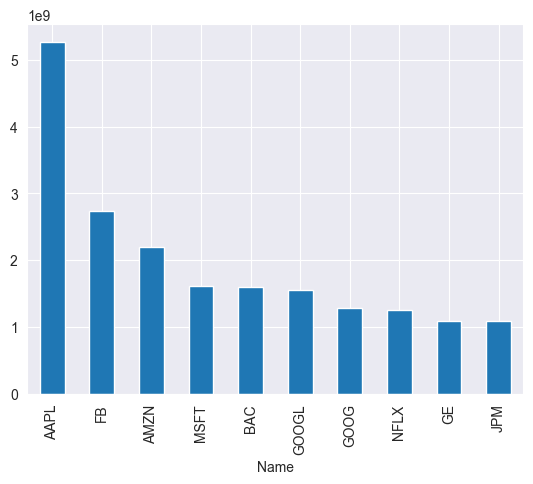

In [131]:
stocks2=stocks_df.copy()
stocks2=stocks2.reset_index()
stocks2.head()
stocks2['year']= stocks2['date'].dt.year
stocks2['total_value']=((stocks2['open']+stocks2['close'])/2)*stocks2['volume']
companies_avg_value=stocks2.groupby('Name')['total_value'].mean()
companies_avg_value.sort_values(ascending=False,inplace=True)
top10Comapnies=companies_avg_value[:10]
top10Comapnies.plot(kind='bar')

<AxesSubplot: xlabel='year'>

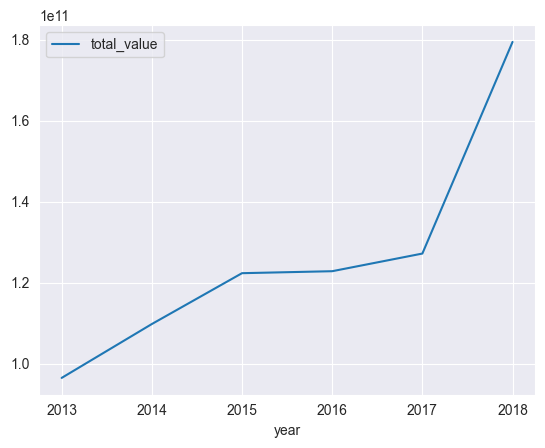

In [152]:
byYear=stocks2.groupby(['year','Name'])['total_value'].mean()
byYear=byYear.groupby('year').sum()
byYear = pd.byYear = pd.DataFrame(byYear)
byYear = byYear.reset_index()
byYear.plot(x='year', y='total_value', kind='line')


### Correlation between features

C:\Users\INTEL\AppData\Local\Temp\ipykernel_14952\3281747785.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=stocks2.corr(), annot=True)


<AxesSubplot: title={'center': 'Average Arrival Delay for Each Airline, by Month'}>

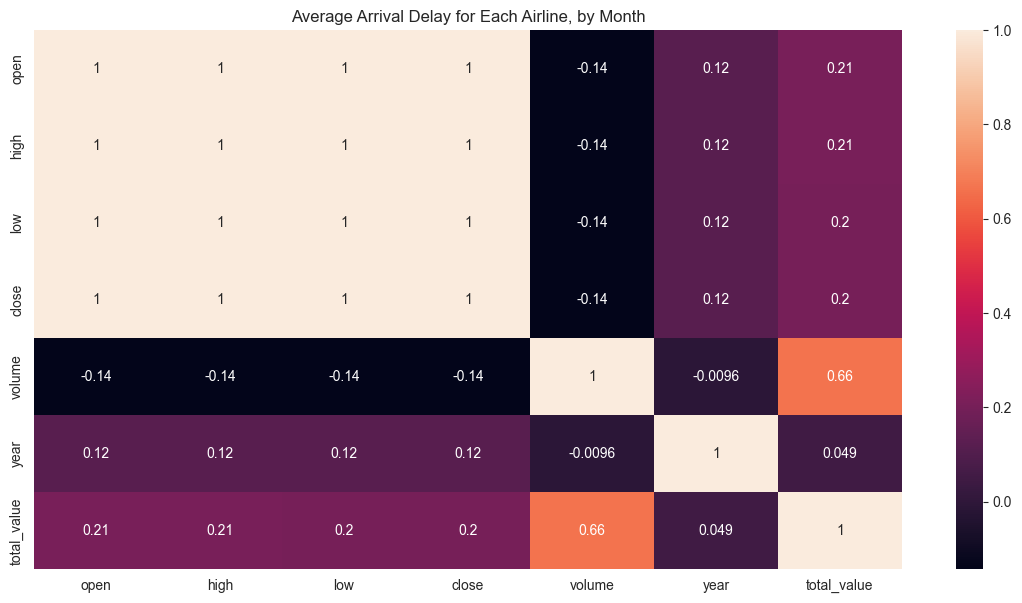

In [154]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=stocks2.corr(), annot=True)